In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib as mpl
import datetime
from datetime import timedelta
# from datetime import datetime, date
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothicCoding'
import os

In [6]:
pwd

'/home/miwoos/WorkSpace/Jeju_Electric_Vehicle_analysis'

In [3]:
os.chdir('/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data/')

In [3]:
# os.chdir('G:\내 드라이브\제주_전기차\data')

In [4]:
ls

 elecafe.csv                       전기차관련검색어인기순.csv
 관련키워드.csv                    전기차관심도지역.csv
 네이버-제주전기차후기통합.csv     전기차관심증가.csv
 느영나영전기차크롤링.csv          전기차키워드관련주제인기순.csv
 느영나영전기차크롤링.csv.part     전체본문의댓글결과_2022.03.06.xlsx
'본문 검색 결과_2022.03.06.xlsx'   제사모크롤링.csv
'전기차 동호회 전기차크롤링.csv'   투플럭스sjeju.csv


In [5]:
df_cafe = pd.read_csv('elecafe.csv')

In [7]:
df_cafe.head(3)

,제목,내용,댓글,유형,조회수,작성날짜,월별,카페명
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.,2022.03,제사모
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모
2,더 뉴 아이오닉 일렉트릭N 20년형 흰색7만 현대스마트센스 l추가 완전무사고/믿고사...,★ 차량 정보 ★\n\n▶▷모델명 : 더 뉴 아이오닉 일렉트릭 N 전기차\n\n▶▷...,NaN,중고자동차 매물,62,2022.03.16.,2022.03,제사모


In [8]:
df_elecafe = pd.read_csv('투플럭스sjeju.csv')

In [9]:
df_elecafe.head(3)

,제목,카페명,작성날짜,내용,조회수,긍부정,Url,월
0,전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요~(...,전기차동호회,2020-05-13 15:19:00,▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...,2461,P,https://cafe.naver.com/allfm01/463393,2020.05
1,코나 급발진 실화냐,전기차동호회,2021-03-04 21:15:00,▶ 코나 급발진 실화냐_x000D_\n_x000D_\n주차 차단기 뚫고 쾅…전기차도...,753,N,https://cafe.naver.com/allfm01/577259,2021.03
2,약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 2020년...,전기차동호회,2020-01-03 04:57:00,▶ 약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 202...,690,P,https://cafe.naver.com/allfm01/413286,2020.01


## 월별 년별 로 바꾸기

In [12]:
df_elecafe[""]= str(df_elecafe.작성날짜[0]).replace('-','.')[:7]

In [13]:
df_elecafe['월'] = df_elecafe['작성날짜'].apply(lambda x : str(x).replace('-','.')[:7])

In [43]:
df_elecafe['년'] = df_elecafe['작성날짜'].apply(lambda x : str(x).replace('-','.')[:4])

In [16]:
ls

 elecafe.csv                       전기차관련검색어인기순.csv
 관련키워드.csv                    전기차관심도지역.csv
 네이버-제주전기차후기통합.csv     전기차관심증가.csv
 느영나영전기차크롤링.csv          전기차키워드관련주제인기순.csv
 느영나영전기차크롤링.csv.part     전체본문의댓글결과_2022.03.06.xlsx
'본문 검색 결과_2022.03.06.xlsx'   제사모크롤링.csv
'전기차 동호회 전기차크롤링.csv'   투플럭스sjeju.csv


In [23]:
# df_elecafe.to_csv('투플럭스sjeju.csv',index=False)

In [44]:
df_elecafe.head(3)

,제목,카페명,작성날짜,내용,조회수,긍부정,Url,월,년
0,전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요~(...,전기차동호회,2020-05-13 15:19:00,▶ 전기차충전요금 원복및 조속한 충전인프라확충에대한 국민청원을 진행하려니 읽어보셔요...,2461,P,https://cafe.naver.com/allfm01/463393,2020.05,2020
1,코나 급발진 실화냐,전기차동호회,2021-03-04 21:15:00,▶ 코나 급발진 실화냐_x000D_\n_x000D_\n주차 차단기 뚫고 쾅…전기차도...,753,N,https://cafe.naver.com/allfm01/577259,2021.03,2021
2,약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 2020년...,전기차동호회,2020-01-03 04:57:00,▶ 약930일을 운행한 후에 운행하면서 느낀점을 수정 추가해서 적어보았습니다 202...,690,P,https://cafe.naver.com/allfm01/413286,2020.01,2020


<Figure size 1080x720 with 0 Axes>

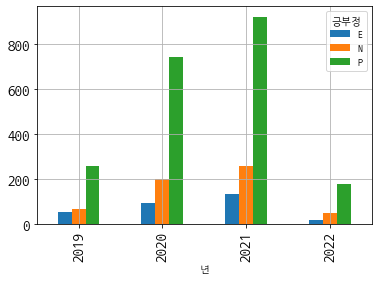

In [55]:
plt.figure(figsize=(15,10))
df_elecafe.groupby([df_elecafe.년,df_elecafe.긍부정]).긍부정.count().unstack().plot.bar(fontsize=15)
plt.grid()

In [62]:
df_cafe.head(2)

,제목,내용,댓글,유형,조회수,작성날짜,카페명
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.,제사모
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.,제사모


In [21]:
'hi'.__contains__('i')

True

In [18]:
str(x)[:7]

NameError: name 'x' is not defined

In [19]:
df_cafe['월별']=df_cafe.작성날짜.apply(lambda x:str(x)[:7])

In [20]:
df_cafe

,제목,내용,댓글,유형,조회수,작성날짜,카페명,월별
0,봉고3더블캡,"※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n...",가격이 궁금해요..^^\n얼마인가요ㅡ\n,제사모 중고장터,130,2022.03.16.,제사모,2022.03
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서. 렌트카 알아보고 있어요. 육지에...,요즘 전기차가 대세기도 하지만 가스값 장난아니게 올랏어요...또한 한달살기라면 자차...,Q. 종합 질문방,161,2022.03.16.,제사모,2022.03
2,더 뉴 아이오닉 일렉트릭N 20년형 흰색7만 현대스마트센스 l추가 완전무사고/믿고사...,★ 차량 정보 ★\n\n▶▷모델명 : 더 뉴 아이오닉 일렉트릭 N 전기차\n\n▶▷...,NaN,중고자동차 매물,62,2022.03.16.,제사모,2022.03
3,요번에 보니..,안에\n\n렌터카 무진장 많이 다니던데..\n\n임산부 노약자 상관없이..\n\n넘...,NaN,실시간 이야기,119,2022.03.15.,제사모,2022.03
4,제주시 애월읍 해안도로 도보 1분 거리 애월 르시엘 아파트 할인 분양(회사 직영),◈ 매물제목 : 애월 르시엘 분양\n◈ 거래유형 : 분양\n◈ 소재지역 : 애...,NaN,■ 분양정보/신축매물,134,2022.03.15.,제사모,2022.03
...,...,...,...,...,...,...,...,...
5910,[링크스크랩] 100% 순수 전기차 ‘SM3 Z.E.’ 보급 위해 특별 할인 제공,출처\n뉴스>동아일보 | 네이버 뉴스,정부 보조금 까지 받게 된다면 엄청 싸게 살수 있겠네요....서울에서 다시 보조금 ...,제주특별자치도,111,2015.03.08.,전기차동호회,2015.03
5911,"[링크스크랩] 자동차 업계, 제주도 전기차 민간 보급 공모 총력전…가격 인하 이어져",출처\n뉴스>전자신문 | 네이버 뉴스,쏘울 내일 받는데 100만원 낮아지다니....ㅠㅠ\n서울도 다시한번더 보조금 지원하...,제주특별자치도,84,2015.03.04.,전기차동호회,2015.03
5912,등업부탁해요 하반기 전기차를 신청하고싶었는데,하반기 전기차를 신청하고싶었는데\n주차장문제로 못하로 내년 상반기를 기대합니다\n등...,반가워요~~😊\n내년에 제주도 전기차 공급량이 대박이던데 좋은소식 있으시길...\n...,제주특별자치도,76,2014.10.26.,전기차동호회,2014.10
5913,ㅇㅇ,ㅇ,0\n,제주특별자치도,35,2014.06.21.,전기차동호회,2014.06


In [21]:
df_cafe['년별']=df_cafe.작성날짜.apply(lambda x:str(x)[:4])

In [24]:
df_cafe.isnull().sum()

제목        0
내용      114
댓글      648
유형        0
조회수       0
작성날짜      0
카페명       0
월별        0
년별        0
dtype: int64

In [26]:
# df_cafe.fillna('내용없음',inplace=True)

In [32]:
df_cafe.내용[0]
df_cafe.내용[0]df_cafe.내용[0]

'※ 보다 투명하고, 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요. ※ \n\n\n1. 거래 지역 : 한림\n\n2. 거래 방법 : 직거래\n\n3. 연락 방법 : 010-2525-5552\n(연락처, 안심번호, 쪽지, 채팅 가능 / 📵카카오톡 금지) \n\n4. 판매 가격 : 연락주세요\n\n5. 판매 제품 : 봉고3더블캡\n\n6. 제품 상태 : 중고차량\n(사용감 있음, 거의 새 것, 미개봉) \n\n7. 제품설명 및 사진 \n-봉고3더블캡  18년 6월식 \n정확히 5만탔구요\n오토. \n차량 잡소리 하나도 안나요\n전기차 나와서 팔아요\n\n\n블랙박스.0\n후방감지 0\n네비 ×\n열선시트 0\n열선 핸들 0\n만든공구함 박스 0\n핸즈프리 0\n'